<b>Q1. Classify the iris dataset using a decision tree classifier. Divide the dataset into training and
testing in the ratio 80:20. Use the functions from the sklearn package. Display the final decision
tre<b/>e.

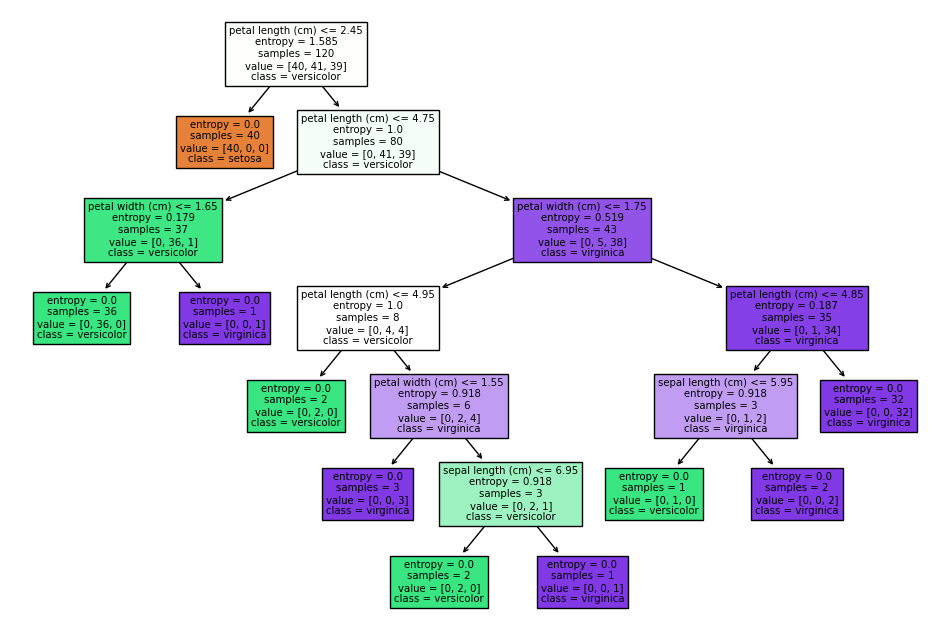

1.0


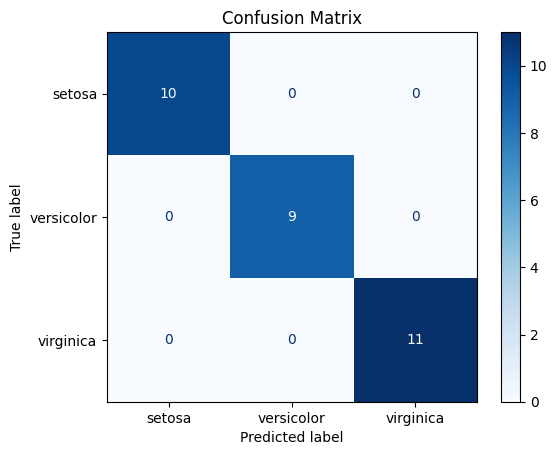

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

iris = load_iris()
x= iris.data
y = iris.target

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train,y_train)
plt.figure(figsize=(12,8))
plot_tree(clf,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)
plt.show()
print(clf.score(x_test,y_test))

y_pred = clf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

<b>Q2.Classify the iris dataset using a Bayes classifier. Divide the dataset into training and testing in
the ratio 80:20. Use the functions from the sklearn package. Assume the data follows a
gaussian distribution. Display the training and testing accuracy, confusion matri<b/>x.

Training Accuracy:  0.95
Testing Accuracy:  1.0


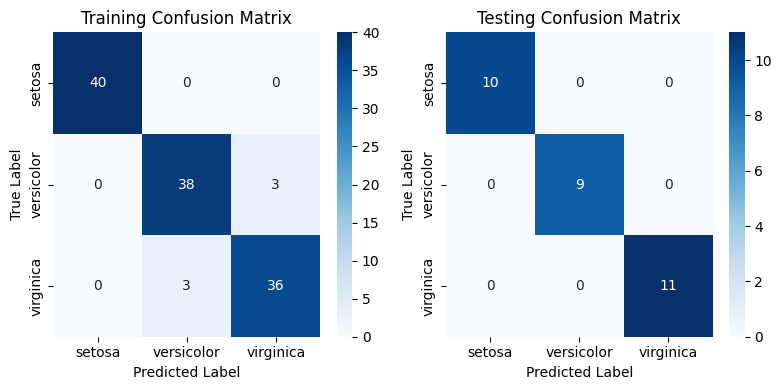

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

iris =load_iris()
x = iris.data
y = iris.target

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.2,random_state=42)

clf = GaussianNB()
clf.fit(x_train,y_train)

train_pred = clf.predict(x_train)
test_pred = clf.predict(x_test)

train_acc = accuracy_score(y_train,train_pred)
test_acc = accuracy_score(y_test,test_pred)

print("Training Accuracy: ",train_acc)
print('Testing Accuracy: ',test_acc)

train_conf_mat = confusion_matrix(y_train,train_pred)
test_conf_mat = confusion_matrix(y_test,test_pred)

plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.heatmap(train_conf_mat,annot=True,fmt='d',cmap="Blues",xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.subplot(1, 2, 2)
sns.heatmap(test_conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Testing Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()

<b>Q3.Classify the iris dataset using the KNN classifier. Divide the dataset into training, validation, and
testing in the ratio 70:15:15. Use the functions from the sklearn package. Find the best value
for k. Normalize the dataset before applying the model. Display the training, validation, and
testing accuracy, confusion matr<b>ix.

the best k is  3  and the best accuracy is  1.0


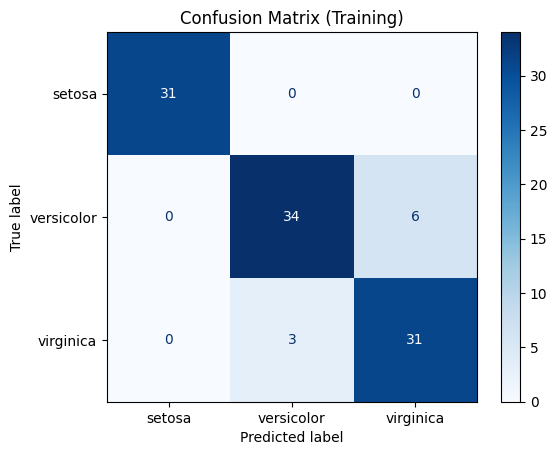

The training accuracy is  0.9142857142857143


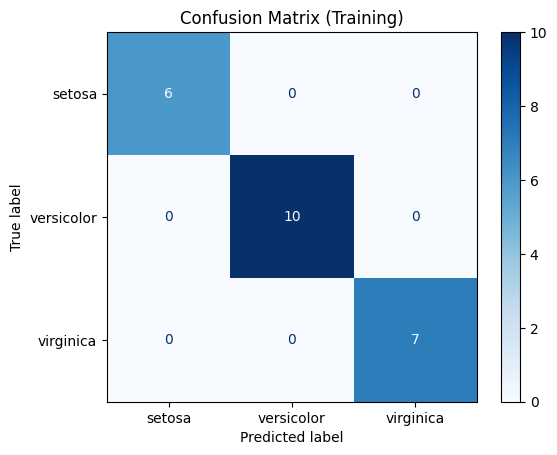

The validation accuracy is  1.0


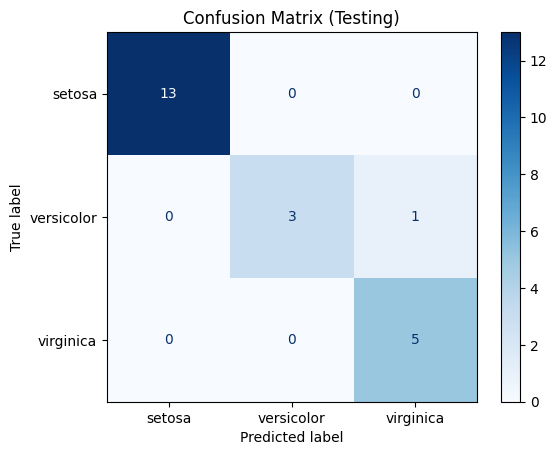

The testing accuracy is  0.9545454545454546


In [13]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

data = load_iris()
x = data['data']
y = data['target']
sc = MinMaxScaler()
x_train,x_temp,y_train,y_temp = train_test_split(x,y,test_size=.30,random_state=42)
x_test,x_val,y_test,y_val = train_test_split(x_temp,y_temp,test_size=.50,random_state=42)
x_train = sc.fit_transform(x_train)
x_val = sc.transform(x_val)
x_test = sc.transform(x_test)

best_acc= 0
best_k = 0
k_values = range(3,31)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    curr_pred = knn.predict(x_val)
    curr_acc = accuracy_score(curr_pred,y_val)

    if curr_acc>best_acc:
        best_acc = curr_acc
        best_k = k

print('the best k is ',best_k,' and the best accuracy is ',best_acc)
    
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train,y_train)
train_pred = knn.predict(x_train)
val_pred = knn.predict(x_val)
test_pred = knn.predict(x_test)

#training Accuracy
train_accu = accuracy_score(train_pred,y_train)
train_conf_maxtrix = confusion_matrix(train_pred,y_train)
disp = ConfusionMatrixDisplay(confusion_matrix=train_conf_maxtrix, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Training)')
plt.show()
print('The training accuracy is ',train_accu)

#Validation Accuracy
val_accu = accuracy_score(val_pred,y_val)
val_conf_maxtrix = confusion_matrix(val_pred,y_val)
train_accu = accuracy_score(train_pred,y_train)
train_conf_maxtrix = confusion_matrix(train_pred,y_train)
disp = ConfusionMatrixDisplay(confusion_matrix=val_conf_maxtrix, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Training)')
plt.show()
print('The validation accuracy is ',val_accu)

#Testing Accuracy
test_accu = accuracy_score(test_pred,y_test)
test_conf_maxtrix = confusion_matrix(test_pred,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=test_conf_maxtrix, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Testing)')
plt.show()
print('The testing accuracy is ',test_accu)

<b>Q4.Create a linear regression model using ordinary least squares estimation. Find the best fit line
for the dataset ‘salary.csv’ using the above model. Display the training and testing dataset in the
scatter plot and draw the best fit line in the same. Also find the MSE and R2 for the testing
datas<b/>et.

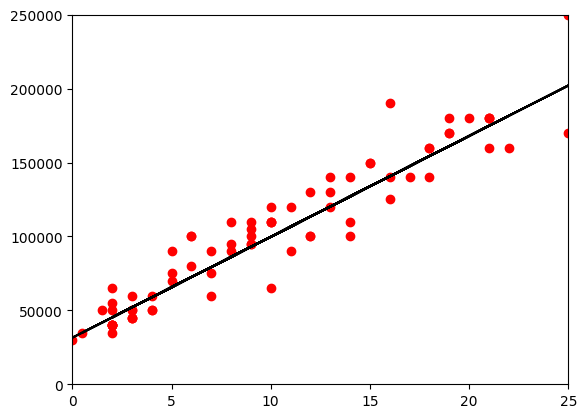

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score


data = pd.read_csv("Salary Data.csv")
data = data.dropna()
x = data.iloc[:,4]
y = data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

class OLS:
    x_mean = 0
    y_mean = 0
    beta_0 = 0
    beta_1 = 0
    
    def fit(self, x_train, y_train):
        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)
        
        x_minus_x_mean = x_train - x_mean
        y_minus_y_mean = y_train - y_mean
        
        prod = x_minus_x_mean*y_minus_y_mean
        prod_sum = np.sum(prod)
                
        x_minus_x_mean_WS_sum = np.sum(np.square(x_minus_x_mean))
        
        self.beta_1 = prod_sum/x_minus_x_mean_WS_sum
        self.beta_0 = y_mean - (self.beta_1*x_mean)
        
        return self.beta_1, self.beta_0
    
    def predict(self, x_test):
        y_pred = []
        for i in x_test:
            y_pred.append(self.beta_0 + (self.beta_1*i))
        return np.array(y_pred)
    
predictor = OLS()
coeff = predictor.fit(x_train, y_train)
y_pred = predictor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.plot(x_test, y_pred, c='black')
plt.scatter(x_test, y_test, c='red')
plt.xlim(0.0, 25.0)
plt.ylim(0.0, 250000.0)
plt.show()

<b>Q5. Consider the dataset california_housing from sklearn . Find the correlation b/w the different
attributes of this dataset. Using the least square estimation method from sklearn, find the best fit
line. Also find the error<b/>

Attributes with the highest correlation: MedInc and MedInc
Mean Squared Error: 0.7091157771765548
Coefficients: [0.41933849]
Intercept: 0.44459729169078677


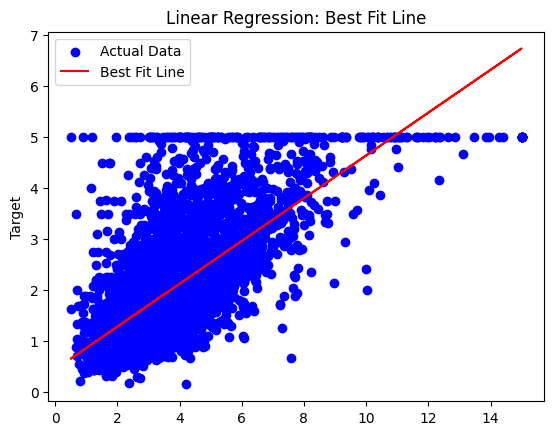

In [15]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target
california_housing.feature_names

df = pd.DataFrame(X, columns=california_housing.feature_names)
df['Target'] = y

# Calculate the correlation matrix
correlation_matrix = df.corr()
correlation_matrix

highest_correlation_pair = correlation_matrix.unstack().sort_values().drop_duplicates().nlargest(2)
attribute1, attribute2 = highest_correlation_pair.index[0]
print("Attributes with the highest correlation:", attribute1, "and", attribute2)

# Extract the selected attributes
X_selected = df[attribute1].values.reshape(-1, 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on testing data
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print coefficients of the best-fit line
print("Coefficients:", model.coef_)

# Print intercept of the best-fit line
print("Intercept:", model.intercept_)

plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plot the best fit line
plt.plot(X_test, y_pred, color='red', label='Best Fit Line')

# Add labels and title

plt.ylabel('Target')
plt.title('Linear Regression: Best Fit Line')
plt.legend()

# Show plot
plt.show()

<b>Q6.Consider the dataset ‘Adveristing.csv’. Find the correlation coefficient between the input
attributes TV, Radio, Newspaper and Output Attribute Sales. Use least square estimation
method to find the line of regression b/w
1. TV and Sales
2. Radio and Sales
3. Newspaper and Sales
For all of the above options, also draw a scatter plot and line of regression. Also find the error in
each of the above.<b/>

Correlation Coefficients:
TV and Sales: 0.7822244248616066
Radio and Sales: 0.5762225745710553
Newspaper and Sales: 0.22829902637616534


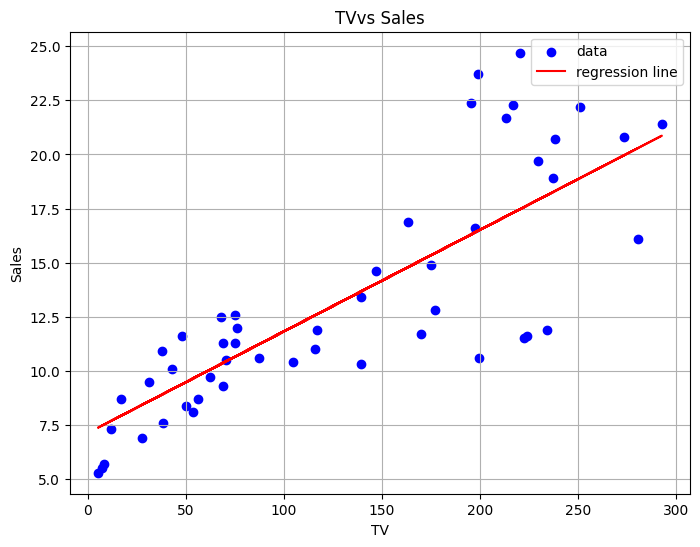

The Error for TV:Sales is  9.179298570399794


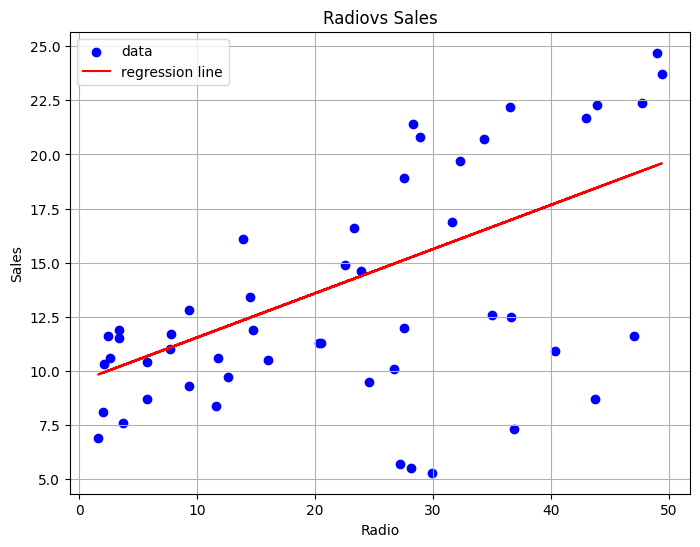

The Error for Radio:Sales is  19.81841412574943


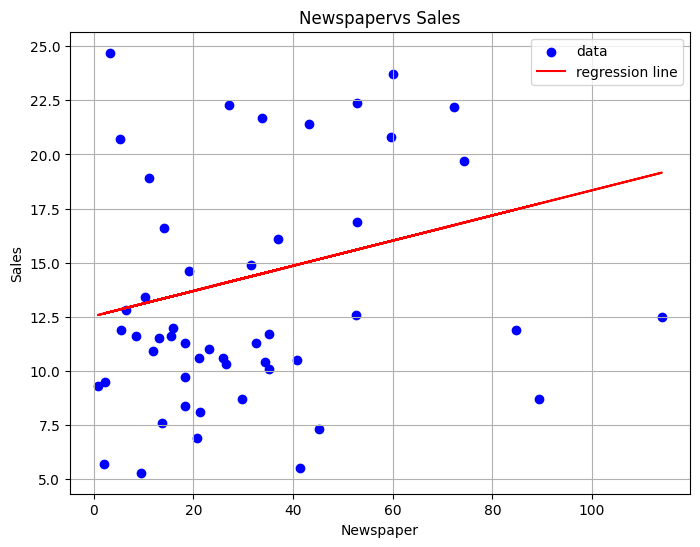

The Error for Newspaper:Sales is  27.035491388135057


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv('Advertising.csv')
x = data[['TV','Radio','Newspaper']]
y = data['Sales']
correlation_tv_sales = data['TV'].corr(data['Sales'])
correlation_radio_sales = data['Radio'].corr(data['Sales'])
correlation_newspaper_sales = data['Newspaper'].corr(data['Sales'])
print("Correlation Coefficients:")
print("TV and Sales:", correlation_tv_sales)
print("Radio and Sales:", correlation_radio_sales)
print("Newspaper and Sales:", correlation_newspaper_sales)

input_attri = ['TV','Radio','Newspaper']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)
for i in input_attri:
    lr = LinearRegression()
    lr.fit(x_train[i].values.reshape(-1,1),y_train)

    y_pred = lr.predict(x_test[i].values.reshape(-1,1))
    mse = mean_squared_error(y_test,y_pred)

    plt.figure(figsize=(8,6))
    plt.scatter(x_test[i],y_test,label = 'data',color='blue')
    plt.plot(x_test[i],y_pred,color='red',label = 'regression line')
    plt.title(f'{i}vs Sales')
    plt.xlabel(i)
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f'The Error for {i}:Sales is ',mse)

<b>Q7.Consider the dataset ‘Adveristing.csv’. Find the best fit regression line between the input
attributes TV, Radio, Newspaper and Output Attribute Sales using gradient descent method.
Also find R2 .<b/>

In [17]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = pd.read_csv('Advertising.csv')
data_scaled = scaler.fit_transform(data[['TV']])

# Extract input attributes (TV, Radio, Newspaper) and output attribute (Sales)
X = data_scaled
X = np.column_stack((np.ones_like(X[:, 0]), X))
X.shape[0]

class GradientDescent:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.coefficients = None

    def fit(self, X, y):
        m = len(y)
        X = np.column_stack((np.ones_like(X[:, 0]), X))  # Add intercept term
        n = X.shape[1]
        self.coefficients = np.zeros((n, 1))  # Initialize coefficients to zeros

        for _ in range(self.iterations):
            y_pred = np.dot(X, self.coefficients)
            error = y_pred - y
            gradient = np.dot(X.T, error) / m
            self.coefficients -= self.learning_rate * gradient

    def predict(self, X):
        X = np.column_stack((np.ones_like(X[:, 0]), X))  # Add intercept term
        return np.dot(X, self.coefficients)
    def line(self):
        return self.coefficients
    def r_squared(self, X, y):
        y_pred = self.predict(X)
        ss_total = np.sum((y - np.mean(y)) ** 2)
        ss_residual = np.sum((y - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)

# Load the dataset
data = pd.read_csv('Advertising.csv')
data_scaled = scaler.fit_transform(data[['TV']])


# Extract input attributes (TV, Radio, Newspaper) and output attribute (Sales)
X = data_scaled
y = data['Sales'].values.reshape(-1, 1)
y = scaler.transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

# Initialize and fit the GradientDescentOLS model
model = GradientDescent()
model.fit(X_train, y_train)
l = model.line()
print(l)
y_pred=model.predict(X_test)
# print(y_pred)
# print(y_test)
# Calculate R-squared value
r2 = model.r_squared(X_train, y_train)

print("R-squared value:", r2)



[[-1.55207327]
 [ 0.04881409]]
R-squared value: 0.6182802532805556


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<b>Q8. Use logistic regression to build a model to classify the breast cancer dataset Divide the dataset
into training and testing in the ratio 70:30 . Print the confusion matrix, sensitivity, specificity. For
each iteration of training, store the training and testing accuracy. Plot a graph showing training
and testing accuracy Vs iteration no. Do not use sklearn logistic function.<b/>

C:\Users\goyal\AppData\Local\Temp\ipykernel_17692\3147096255.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Confusion Matrix:
[[61  2]
 [10 98]]
Sensitivity: 0.9074074074074074
Specificity: 0.9682539682539683


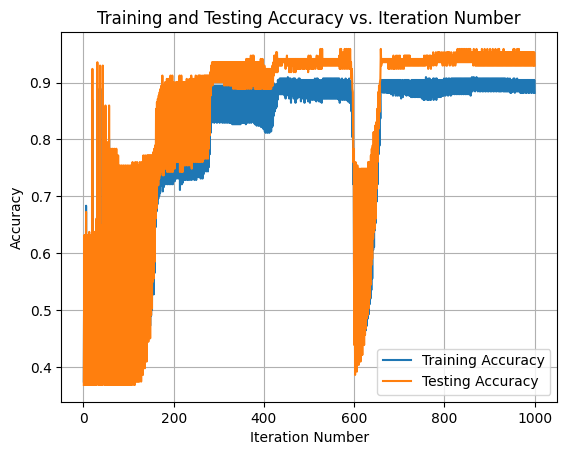

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.training_accuracy = []
        self.testing_accuracy = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, x, y):
        n_samples, n_features = x.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            model = np.dot(x, self.weights) + self.bias
            predictions = self.sigmoid(model)

            dw = (1 / n_samples) * np.dot(x.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            train_acc = self.accuracy(x, y)
            test_acc = self.accuracy(x_test, y_test)
            self.training_accuracy.append(train_acc)
            self.testing_accuracy.append(test_acc)

    def predict(self, x):
        model = np.dot(x, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return predictions.round()

    def accuracy(self, x, y):
        predictions = self.predict(x)
        accuracy = np.mean(predictions == y)
        return accuracy

data = load_breast_cancer()
x, y = data.data, data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = LogisticRegression(learning_rate=0.01, n_iterations=1000)
model.fit(x_train, y_train)

# Predictions on testing set
y_pred = model.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate sensitivity and specificity
TN, FP, FN, TP = conf_matrix.ravel()
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Confusion Matrix:")
print(conf_matrix)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

plt.plot(range(1, model.n_iterations + 1), model.training_accuracy, label='Training Accuracy')
plt.plot(range(1, model.n_iterations + 1), model.testing_accuracy, label='Testing Accuracy')
plt.xlabel('Iteration Number')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs. Iteration Number')
plt.legend()
plt.grid(True)
plt.show()


<b>Q9.Using logistic regression to build a model to classify the iris dataset. Divide the dataset into
training and testing in the ratio 80:20 . Print the confusion matrix, sensitivity and specificity.<b/>

In [19]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

data = load_iris()
x = data.data
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
specificity = []
sensitivity = []

for i in range(3):  
    true_negatives = np.sum(np.delete(np.delete(conf_matrix, i, axis=0), i, axis=1))
    false_positives = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
    specificity_i = true_negatives / (true_negatives + false_positives)
    specificity.append(specificity_i)
    
    true_positives = conf_matrix[i, i]
    false_negatives = np.sum(conf_matrix[i, :]) - conf_matrix[i, i]
    sensitivity_i = true_positives / (true_positives + false_negatives)
    sensitivity.append(sensitivity_i)

print("Specificity for each class:", specificity)
print("Sensitivity for each class:", sensitivity)

Specificity for each class: [1.0, 1.0, 0.95]
Sensitivity for each class: [1.0, 0.9, 1.0]


<b>Q10.Create a linear regression model using the gradient descent method. Create a class to
represent the model with the following functions - init, fit and predict. Find the best fit line for the
dataset Also find the MSE and R2 for the testing dataset.
<b/>

In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

class LinearRegressionGradientDescent:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.coefficients = None

    def fit(self, X, y):
        m, n = X.shape
        self.coefficients = np.zeros(n)

        for _ in range(self.iterations):
            y_pred = np.dot(X, self.coefficients)
            error = y_pred - y
            gradient = np.dot(X.T, error) / m
            self.coefficients -= self.learning_rate * gradient

    def predict(self, X):
        return np.dot(X, self.coefficients)

# Assuming X_train, y_train, X_test, y_test are already defined

model = LinearRegressionGradientDescent()
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 0.060750399779455816
R-squared (R2): 0.9088744003308162


<b>Q11. Consider the dataset wine from sklearn. Using PCA reduce the dimensionality of the dataset to
5. Build a classification model using gaussian naive bayes classifier. Find the training accuracy
and test accurac<b/>
y.

In [21]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

wine = load_wine()
X, y = wine.data, wine.target
df = pd.DataFrame(X,columns=wine.feature_names)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

sc = MinMaxScaler()
X_train_pca = sc.fit_transform(X_train_pca)
X_test_pca = sc.transform(X_test_pca)
gnb = GaussianNB()

gnb.fit(X_train_pca, y_train)

y_train_pred = gnb.predict(X_train_pca)
y_test_pred = gnb.predict(X_test_pca)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.9366197183098591
Test Accuracy: 1.0


<b>Q12.Consider the dataset iris. Apply the PCA method to select the best 2 features. Using these
features plot the scatter graph. Apply k-means clustering algorithm to cluster the transformed
dataset into 3 cluste<b/>rs

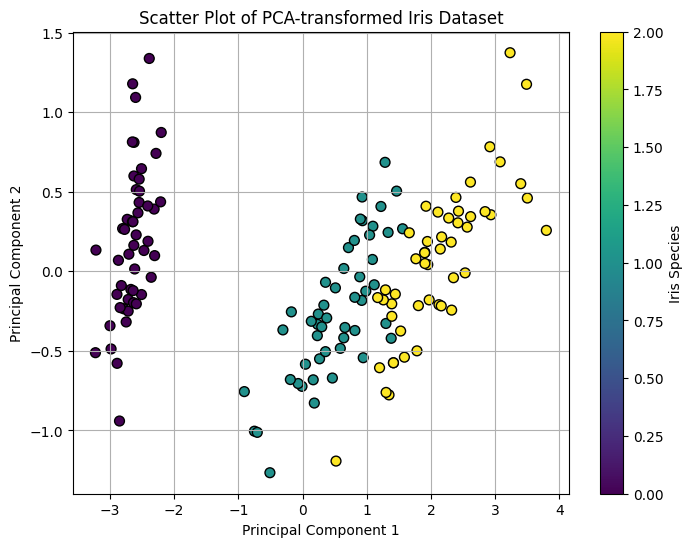

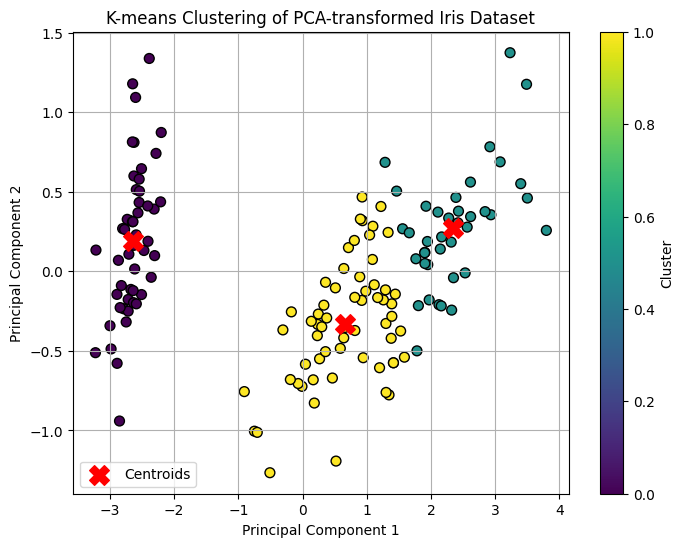

In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Apply PCA to select the best 2 features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the scatter graph
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Scatter Plot of PCA-transformed Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Iris Species')
plt.grid(True)
plt.show()

# Apply K-means clustering algorithm
kmeans = KMeans(n_clusters=3, random_state=55)
kmeans.fit(X_pca)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering of PCA-transformed Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.show()


<b>Q13.Write a program to implement a single layer perceptron model. Train this for solving a AND
problem with 3 variables.<b/>

In [23]:
import numpy as np
from sklearn.linear_model import Perceptron


x = np.array([[0, 0, 0],[0, 0, 1],[0, 1, 0],[0, 1, 1],[1, 0, 0],[1, 0, 1],[1, 1, 0],[1, 1, 1]])

y = np.array([0, 0, 0, 0, 0, 0, 0, 1])

perceptron = Perceptron(max_iter=1000,eta0=0.01,tol=1e-7)
perceptron.fit(x,y)

print(perceptron.score(x,y))


0.75


<b>Q14.Consider the dataset iris. Apply hierarchical clustering algorithm to cluster the dataset into 3
clusters.<b/>

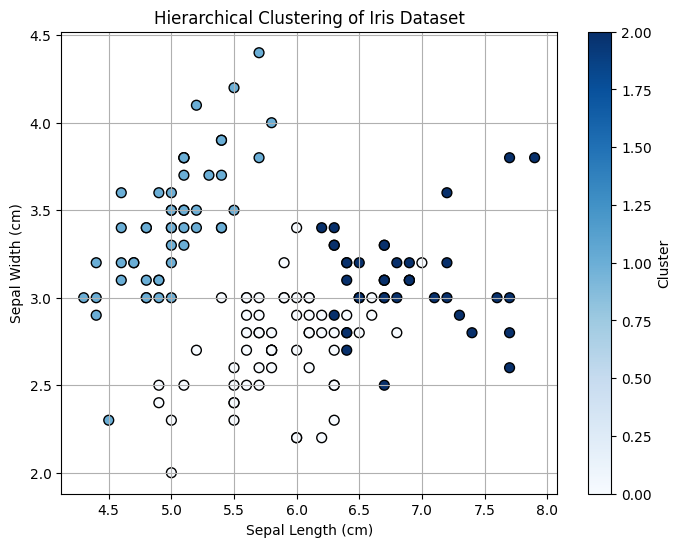

Silhouette Score: 0.5543236611296419


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Apply hierarchical clustering algorithm
clusterer = AgglomerativeClustering(n_clusters=3)
cluster_labels = clusterer.fit_predict(X)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='Blues', edgecolor='k', s=50)
plt.title('Hierarchical Clustering of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Evaluate clustering performance using silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)


<b>Q15.Write a program to implement 2-layered ANN for classifying digits datasets from sklearn. Use
70% data for training the model and check the accuracy of the model on remaining 30% data.
Use softmax activation function in the last layer and relu function in the hidden layer<b/>

In [25]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

digits = load_digits()
x = digits.data
y = digits.target

sc = MinMaxScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9851851851851852
